In [134]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
dataset_name = 'subjective_belief_observers_features_labels.csv'
data = pd.read_csv(dataset_name)

In [136]:
# check data integrity
observers_predict_label = np.array([0 for _ in range(data.shape[0])])
observers_predict_label.reshape(-1, 1)
true_labels = data.iloc[:, -1]
for i in range(data.shape[0]):
    if data.iloc[i][0][-1] == 'n':
        observers_predict_label[i] = 1
observers_predict_label = pd.DataFrame(observers_predict_label)
correct_trust, correct_doubt, total_trust, total_doubt = 0, 0, 0, 0
for i in range(data.shape[0]):
    if true_labels[i] == 1:
        total_trust += 1
        if observers_predict_label.iloc[i][0] == 1:
            correct_trust += 1
    else:
        total_doubt += 1
        if observers_predict_label.iloc[i][0] == 0:
            correct_doubt += 1

In [137]:
# drop first column of participant id
data.drop(data.columns[0], axis=1, inplace=True)
data = pd.concat([data.iloc[:, -40:-1], observers_predict_label], axis=1)
# normalise input data
for column in data.columns[:-1]:
    # the last column is target
    data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())
# according to original dataset 23 participants are involved
num_participants = 23


In [138]:
num_feats = data.shape[1] - 1
num_inputs = num_feats
num_classes = 2

In [139]:
# hyperparams
num_hidden_neurons = 100
epochs = 200
learning_rate = .01

In [140]:
# for future customizations
def dropout_layer(X, dropout):
    mask = (torch.Tensor(X.shape).uniform_(0, 1)>dropout).float()
    return mask * X / (1.0-dropout)

class TwoLayerNet(torch.nn.Module):
    def __init__(self, n_input, n_hidden, n_output, is_training=True):
        super(TwoLayerNet, self).__init__()
        self.hidden = nn.Linear(n_input, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)
        self.is_training = is_training
    def forward(self, x):
        h_input = self.hidden(x)
        if self.is_training == True:
            h_input = dropout_layer(h_input, .5)
        h_output = F.relu(h_input)
        return self.output(h_output)

class ThreeLayerNet(torch.nn.Module):
    def __init__(self, n_input, hidden1, hidden2, n_output):
        super(ThreeLayerNet, self).__init__()
        self.hidden1 = nn.Linear(n_input, hidden1)
        self.hidden2 = nn.Linear(hidden1, hidden2)
        self.output = nn.Linear(hidden2, n_output)
    def forward(self, x):
        h1 = self.hidden1(x)
        h1_out = F.relu(h1)
        h2 = self.hidden2(h1_out)
        h_output = F.relu(h2)
        return self.output(h_output)

Epoch: 0/200; Loss: 0.6937; Accuracy: 52.56 %
Epoch: 50/200; Loss: 0.6416; Accuracy: 61.93 %
Epoch: 100/200; Loss: 0.3300; Accuracy: 90.06 %
Epoch: 150/200; Loss: 0.0100; Accuracy: 100.00 %


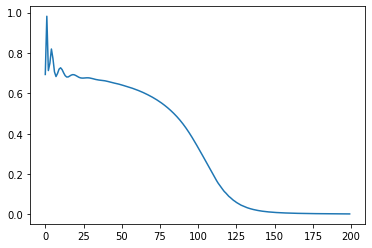

tensor(2.2967, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 62.50 %; correct: 5; wrong: 3;
Test accuracy no-doubt: 37.50 %; correct: 3; wrong: 5;

Epoch: 0/200; Loss: 0.6906; Accuracy: 53.12 %
Epoch: 50/200; Loss: 0.6284; Accuracy: 64.77 %
Epoch: 100/200; Loss: 0.3026; Accuracy: 89.77 %
Epoch: 150/200; Loss: 0.0082; Accuracy: 100.00 %


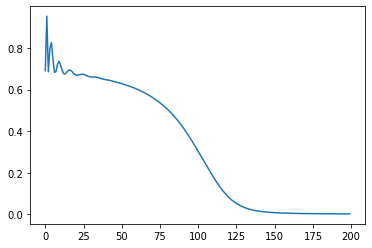

tensor(3.2345, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 30.00 %; correct: 3; wrong: 7;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;

Epoch: 0/200; Loss: 0.7594; Accuracy: 51.99 %
Epoch: 50/200; Loss: 0.6162; Accuracy: 63.35 %
Epoch: 100/200; Loss: 0.1833; Accuracy: 96.59 %
Epoch: 150/200; Loss: 0.0058; Accuracy: 100.00 %


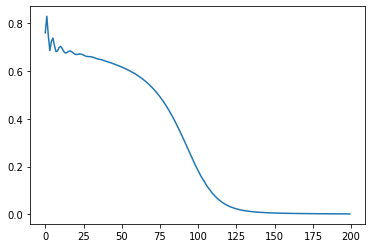

tensor(1.1662, grad_fn=<NllLossBackward>)
Test accuracy total: 81.25 %; correct: 13; wrong: 3;
Test accuracy doubt: 66.67 %; correct: 4; wrong: 2;
Test accuracy no-doubt: 90.00 %; correct: 9; wrong: 1;

Epoch: 0/200; Loss: 0.7056; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.6200; Accuracy: 65.34 %
Epoch: 100/200; Loss: 0.2388; Accuracy: 93.47 %
Epoch: 150/200; Loss: 0.0061; Accuracy: 100.00 %


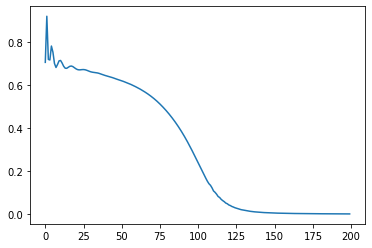

tensor(5.1294, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 0.00 %; correct: 0; wrong: 8;
Test accuracy no-doubt: 100.00 %; correct: 8; wrong: 0;

Epoch: 0/200; Loss: 0.7028; Accuracy: 51.99 %
Epoch: 50/200; Loss: 0.6215; Accuracy: 66.19 %
Epoch: 100/200; Loss: 0.2646; Accuracy: 91.76 %
Epoch: 150/200; Loss: 0.0071; Accuracy: 100.00 %


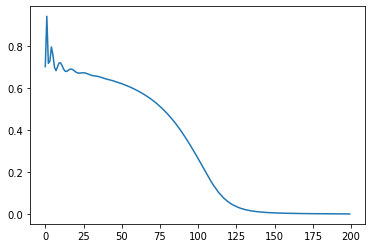

tensor(3.4833, grad_fn=<NllLossBackward>)
Test accuracy total: 37.50 %; correct: 6; wrong: 10;
Test accuracy doubt: 33.33 %; correct: 2; wrong: 4;
Test accuracy no-doubt: 40.00 %; correct: 4; wrong: 6;

Epoch: 0/200; Loss: 0.7863; Accuracy: 53.12 %
Epoch: 50/200; Loss: 0.6074; Accuracy: 65.34 %
Epoch: 100/200; Loss: 0.2084; Accuracy: 94.03 %
Epoch: 150/200; Loss: 0.0065; Accuracy: 100.00 %


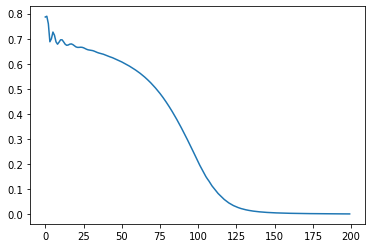

tensor(2.7046, grad_fn=<NllLossBackward>)
Test accuracy total: 43.75 %; correct: 7; wrong: 9;
Test accuracy doubt: 40.00 %; correct: 4; wrong: 6;
Test accuracy no-doubt: 50.00 %; correct: 3; wrong: 3;

Epoch: 0/200; Loss: 0.6995; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.6299; Accuracy: 61.93 %
Epoch: 100/200; Loss: 0.2405; Accuracy: 92.61 %
Epoch: 150/200; Loss: 0.0090; Accuracy: 100.00 %


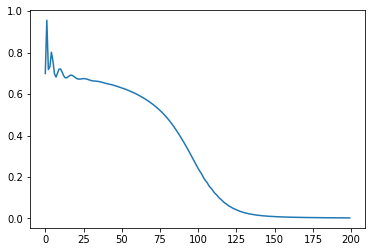

tensor(2.2099, grad_fn=<NllLossBackward>)
Test accuracy total: 43.75 %; correct: 7; wrong: 9;
Test accuracy doubt: 25.00 %; correct: 2; wrong: 6;
Test accuracy no-doubt: 62.50 %; correct: 5; wrong: 3;

Epoch: 0/200; Loss: 0.6924; Accuracy: 52.84 %
Epoch: 50/200; Loss: 0.6242; Accuracy: 66.19 %
Epoch: 100/200; Loss: 0.2755; Accuracy: 90.06 %
Epoch: 150/200; Loss: 0.0080; Accuracy: 100.00 %


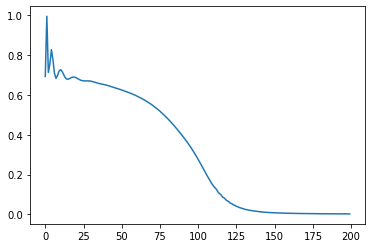

tensor(2.4178, grad_fn=<NllLossBackward>)
Test accuracy total: 43.75 %; correct: 7; wrong: 9;
Test accuracy doubt: 37.50 %; correct: 3; wrong: 5;
Test accuracy no-doubt: 50.00 %; correct: 4; wrong: 4;

Epoch: 0/200; Loss: 0.6919; Accuracy: 52.56 %
Epoch: 50/200; Loss: 0.6366; Accuracy: 63.64 %
Epoch: 100/200; Loss: 0.3626; Accuracy: 86.36 %
Epoch: 150/200; Loss: 0.0129; Accuracy: 100.00 %


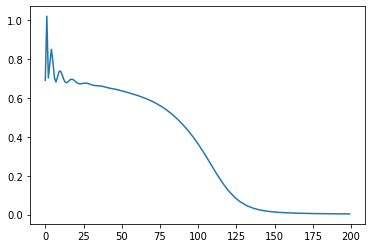

tensor(2.7507, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 75.00 %; correct: 6; wrong: 2;
Test accuracy no-doubt: 37.50 %; correct: 3; wrong: 5;

Epoch: 0/200; Loss: 0.7009; Accuracy: 50.28 %
Epoch: 50/200; Loss: 0.6418; Accuracy: 63.35 %
Epoch: 100/200; Loss: 0.2702; Accuracy: 92.33 %
Epoch: 150/200; Loss: 0.0069; Accuracy: 100.00 %


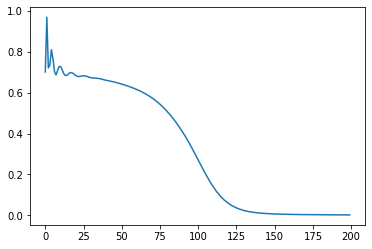

tensor(2.5319, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 75.00 %; correct: 0; wrong: 0;
Test accuracy no-doubt: 56.25 %; correct: 9; wrong: 7;

Epoch: 0/200; Loss: 0.6933; Accuracy: 46.31 %
Epoch: 50/200; Loss: 0.6353; Accuracy: 65.91 %
Epoch: 100/200; Loss: 0.3192; Accuracy: 88.35 %
Epoch: 150/200; Loss: 0.0084; Accuracy: 100.00 %


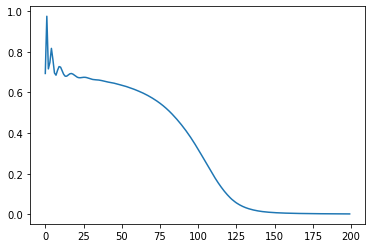

tensor(1.7940, grad_fn=<NllLossBackward>)
Test accuracy total: 62.50 %; correct: 10; wrong: 6;
Test accuracy doubt: 62.50 %; correct: 10; wrong: 6;
Test accuracy no-doubt: 56.25 %; correct: 0; wrong: 0;

Epoch: 0/200; Loss: 0.7925; Accuracy: 53.12 %
Epoch: 50/200; Loss: 0.6175; Accuracy: 64.20 %
Epoch: 100/200; Loss: 0.1998; Accuracy: 95.45 %
Epoch: 150/200; Loss: 0.0071; Accuracy: 100.00 %


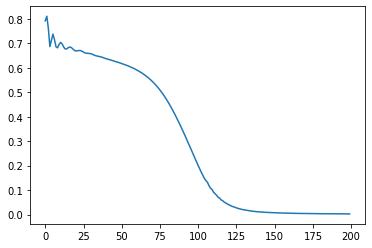

tensor(2.1606, grad_fn=<NllLossBackward>)
Test accuracy total: 62.50 %; correct: 10; wrong: 6;
Test accuracy doubt: 50.00 %; correct: 5; wrong: 5;
Test accuracy no-doubt: 83.33 %; correct: 5; wrong: 1;

Epoch: 0/200; Loss: 0.7008; Accuracy: 51.99 %
Epoch: 50/200; Loss: 0.6283; Accuracy: 65.34 %
Epoch: 100/200; Loss: 0.2797; Accuracy: 91.19 %
Epoch: 150/200; Loss: 0.0078; Accuracy: 100.00 %


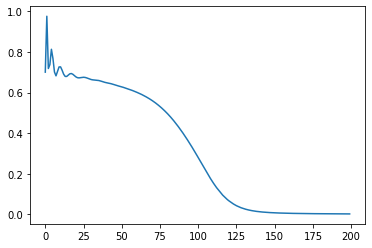

tensor(2.3104, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 33.33 %; correct: 2; wrong: 4;
Test accuracy no-doubt: 60.00 %; correct: 6; wrong: 4;

Epoch: 0/200; Loss: 0.7022; Accuracy: 45.17 %
Epoch: 50/200; Loss: 0.6138; Accuracy: 65.62 %
Epoch: 100/200; Loss: 0.2108; Accuracy: 94.03 %
Epoch: 150/200; Loss: 0.0062; Accuracy: 100.00 %


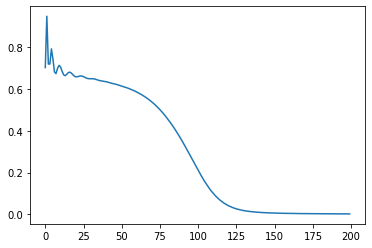

tensor(6.1405, grad_fn=<NllLossBackward>)
Test accuracy total: 12.50 %; correct: 2; wrong: 14;
Test accuracy doubt: 12.50 %; correct: 2; wrong: 14;
Test accuracy no-doubt: 60.00 %; correct: 0; wrong: 0;

Epoch: 0/200; Loss: 0.6935; Accuracy: 52.27 %
Epoch: 50/200; Loss: 0.6322; Accuracy: 64.20 %
Epoch: 100/200; Loss: 0.3906; Accuracy: 85.23 %
Epoch: 150/200; Loss: 0.0165; Accuracy: 100.00 %


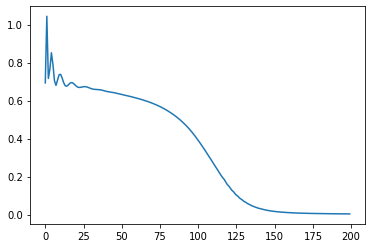

tensor(4.5576, grad_fn=<NllLossBackward>)
Test accuracy total: 31.25 %; correct: 5; wrong: 11;
Test accuracy doubt: 57.14 %; correct: 4; wrong: 3;
Test accuracy no-doubt: 11.11 %; correct: 1; wrong: 8;

Epoch: 0/200; Loss: 0.7150; Accuracy: 52.56 %
Epoch: 50/200; Loss: 0.6184; Accuracy: 65.06 %
Epoch: 100/200; Loss: 0.2171; Accuracy: 94.60 %
Epoch: 150/200; Loss: 0.0064; Accuracy: 100.00 %


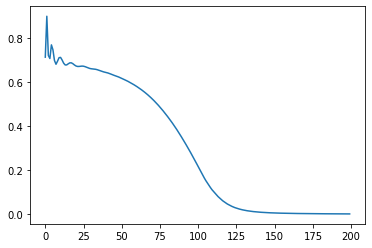

tensor(4.0412, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 8; wrong: 8;
Test accuracy doubt: 25.00 %; correct: 2; wrong: 6;
Test accuracy no-doubt: 75.00 %; correct: 6; wrong: 2;

Epoch: 0/200; Loss: 0.7101; Accuracy: 50.28 %
Epoch: 50/200; Loss: 0.6138; Accuracy: 66.48 %
Epoch: 100/200; Loss: 0.1614; Accuracy: 96.02 %
Epoch: 150/200; Loss: 0.0066; Accuracy: 100.00 %


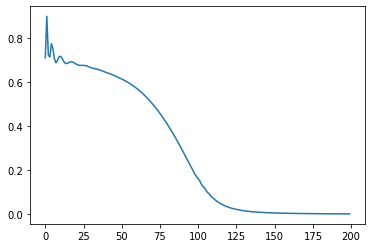

tensor(3.5729, grad_fn=<NllLossBackward>)
Test accuracy total: 31.25 %; correct: 5; wrong: 11;
Test accuracy doubt: 25.00 %; correct: 0; wrong: 0;
Test accuracy no-doubt: 31.25 %; correct: 5; wrong: 11;

Epoch: 0/200; Loss: 0.6938; Accuracy: 46.31 %
Epoch: 50/200; Loss: 0.6274; Accuracy: 64.20 %
Epoch: 100/200; Loss: 0.2993; Accuracy: 88.92 %
Epoch: 150/200; Loss: 0.0103; Accuracy: 100.00 %


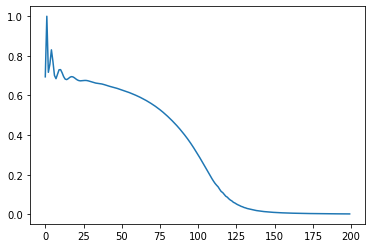

tensor(3.6846, grad_fn=<NllLossBackward>)
Test accuracy total: 37.50 %; correct: 6; wrong: 10;
Test accuracy doubt: 25.00 %; correct: 2; wrong: 6;
Test accuracy no-doubt: 50.00 %; correct: 4; wrong: 4;

Epoch: 0/200; Loss: 0.8174; Accuracy: 47.44 %
Epoch: 50/200; Loss: 0.6164; Accuracy: 67.05 %
Epoch: 100/200; Loss: 0.2172; Accuracy: 94.03 %
Epoch: 150/200; Loss: 0.0106; Accuracy: 100.00 %


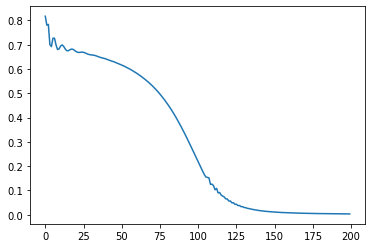

tensor(1.5178, grad_fn=<NllLossBackward>)
Test accuracy total: 62.50 %; correct: 10; wrong: 6;
Test accuracy doubt: 25.00 %; correct: 2; wrong: 6;
Test accuracy no-doubt: 100.00 %; correct: 8; wrong: 0;

Epoch: 0/200; Loss: 0.7344; Accuracy: 50.28 %
Epoch: 50/200; Loss: 0.6317; Accuracy: 64.20 %
Epoch: 100/200; Loss: 0.1962; Accuracy: 95.45 %
Epoch: 150/200; Loss: 0.0065; Accuracy: 100.00 %


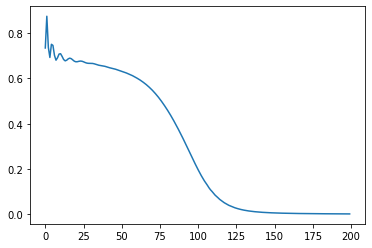

tensor(4.1328, grad_fn=<NllLossBackward>)
Test accuracy total: 31.25 %; correct: 5; wrong: 11;
Test accuracy doubt: 25.00 %; correct: 0; wrong: 0;
Test accuracy no-doubt: 31.25 %; correct: 5; wrong: 11;

Epoch: 0/200; Loss: 0.6929; Accuracy: 53.41 %
Epoch: 50/200; Loss: 0.6325; Accuracy: 63.35 %
Epoch: 100/200; Loss: 0.2974; Accuracy: 90.34 %
Epoch: 150/200; Loss: 0.0107; Accuracy: 100.00 %


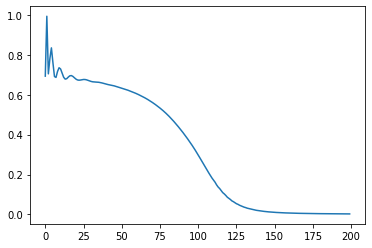

tensor(1.1340, grad_fn=<NllLossBackward>)
Test accuracy total: 81.25 %; correct: 13; wrong: 3;
Test accuracy doubt: 100.00 %; correct: 6; wrong: 0;
Test accuracy no-doubt: 70.00 %; correct: 7; wrong: 3;

Epoch: 0/200; Loss: 0.6916; Accuracy: 53.12 %
Epoch: 50/200; Loss: 0.6307; Accuracy: 64.20 %
Epoch: 100/200; Loss: 0.3370; Accuracy: 87.22 %
Epoch: 150/200; Loss: 0.0111; Accuracy: 100.00 %


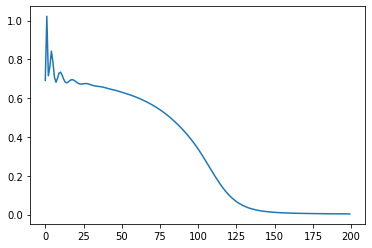

tensor(3.8299, grad_fn=<NllLossBackward>)
Test accuracy total: 43.75 %; correct: 7; wrong: 9;
Test accuracy doubt: 50.00 %; correct: 5; wrong: 5;
Test accuracy no-doubt: 33.33 %; correct: 2; wrong: 4;

Epoch: 0/200; Loss: 0.6912; Accuracy: 52.56 %
Epoch: 50/200; Loss: 0.5911; Accuracy: 68.18 %
Epoch: 100/200; Loss: 0.0651; Accuracy: 99.43 %
Epoch: 150/200; Loss: 0.0042; Accuracy: 100.00 %


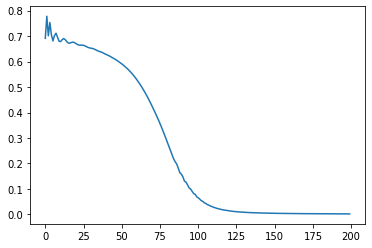

tensor(2.1949, grad_fn=<NllLossBackward>)
Test accuracy total: 68.75 %; correct: 11; wrong: 5;
Test accuracy doubt: 62.50 %; correct: 5; wrong: 3;
Test accuracy no-doubt: 75.00 %; correct: 6; wrong: 2;



In [141]:
all_losses = [[] for _ in range(num_participants)]
test_accuracies = []
test_accuracies_doubt = []
test_accuracies_nodoubt = []
for par in range(num_participants-1, -1, -1):
    # K-fold like method to select one participant as the test set
    msk = [True for _ in range(16*num_participants)]
    for i in range(16*par, 16*(par+1)):
        msk[i] = False
    msk = np.array(msk)
    data_train = data[msk]
    data_test = data[~msk]

# for i in range(2):
#     msk = np.random.rand(len(data)) < 0.5
#     data_train = data[msk]
#     data_test = data[~msk]

    train_inputs = data_train.iloc[:, :num_feats]
    # # pertubation .5
    # train_inputs.iloc[0, :] = 0.5
    # # pertubation avg
    # train_inputs.iloc[0, :] = train_inputs.iloc[1:, :].sum(axis=0)/(train_inputs.shape[0]-1)
    # # pertubation deltas acuumulation
    # train_inputs = train_inputs.cumsum(axis=0)

    train_labels = data_train.iloc[:, num_feats]

    test_inputs = data_test.iloc[:, :num_feats]
    test_labels = data_test.iloc[:, num_feats]

    X_train = torch.tensor(train_inputs.values, dtype=torch.float)
    Y_train = torch.tensor(train_labels.values, dtype=torch.long)

    # net = nn.Sequential(nn.Linear(num_feats, num_hidden_neurons), nn.Sigmoid(), nn.Dropout(.5), nn.Linear(num_hidden_neurons, num_classes))
    # net = TwoLayerNet(num_inputs, num_hidden_neurons, num_classes, is_training=True)
    net = nn.Sequential(nn.Linear(num_feats, num_hidden_neurons), nn.Sigmoid(), nn.Linear(num_hidden_neurons, 100), nn.Sigmoid(), nn.Linear(100, num_classes))
    # use crossentropy loss and adam for optimizer
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    loss_func = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        Y_train_pred = net(X_train)
        loss = loss_func(Y_train_pred, Y_train)
        all_losses[par].append(loss.item())
        if epoch % 50 == 0:
            _, predicted = torch.max(Y_train_pred, 1)
            total = Y_train.data.size(0)
            correct = sum(predicted.data.numpy() == Y_train.data.numpy())
            print('Epoch: %d/%d; Loss: %.4f; Accuracy: %.2f %%' %(epoch, epochs, loss, 100*correct/total))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # extra visulization for training outcomes
    plt.figure()
    plt.plot(all_losses[par])
    plt.show()

    # test our network
    X_test = torch.tensor(test_inputs.values, dtype=torch.float)
    Y_test = torch.tensor(test_labels.values, dtype=torch.long)
    Y_test_pred = net(X_test)
    loss = loss_func(Y_test_pred, Y_test)
    print(loss)
    _, predicted = torch.max(Y_test_pred, 1)
    total_test = Y_test.shape[0]
    correct_test = sum(predicted.data.numpy() == Y_test.data.numpy())
    # calculate doubt and trust separately
    correct_doubt, correct_nodoubt, total_doubt, total_nodoubt = 0, 0, 0, 0
    for i in range(total_test):
        if Y_test.data.numpy()[i] == 1:
            total_nodoubt += 1
            if predicted.data.numpy()[i] == 1:
                correct_nodoubt += 1
        else:
            total_doubt += 1
            if predicted.data.numpy()[i] == 0:
                correct_doubt += 1
    test_accuracies.append(correct_test/total_test)
    if total_doubt != 0:
        test_accuracies_doubt.append(correct_doubt/total_doubt)
    if total_nodoubt != 0:
        test_accuracies_nodoubt.append(correct_nodoubt/total_nodoubt)
    print('Test accuracy total: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies[-1], correct_test, total_test-correct_test))
    print('Test accuracy doubt: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies_doubt[-1], correct_doubt, total_doubt-correct_doubt))
    print('Test accuracy no-doubt: %.2f %%; correct: %d; wrong: %d;\n' %(100*test_accuracies_nodoubt[-1], correct_nodoubt, total_nodoubt-correct_nodoubt))

In [142]:
# print(*[(name, param.shape) for name, param in net.named_parameters()])
weight_input2hidden = np.absolute(net.state_dict()['0.weight'].data.numpy())
weight_hidden2output = np.absolute(net.state_dict()['2.weight'].data.numpy())
weight_input2hidden /= weight_input2hidden.sum(axis=1, keepdims=True)
weight_hidden2output /= weight_hidden2output.sum(axis=1, keepdims=True)
# calculate the Q weight matrix
Q = np.dot(weight_hidden2output, weight_input2hidden).sum(axis=0)
np.argsort(Q)

array([28, 31, 36, 30, 10, 29, 23, 16, 17, 18, 15,  5,  2,  4,  1, 21,  9,
       12, 27,  3,  0, 22,  7,  6, 26,  8, 34, 14, 13, 20, 19, 24, 38, 35,
       37, 25, 33, 32, 11])

In [143]:
# show accuracies
print('Total accuracy: %.3f' %(sum(test_accuracies)/len(test_accuracies)))
print('Doubt accuracy: %.3f' %(sum(test_accuracies_doubt)/len(test_accuracies_doubt)))
print('Trust accuracy: %.3f' %(sum(test_accuracies_nodoubt)/len(test_accuracies_nodoubt)))

Total accuracy: 0.495
Doubt accuracy: 0.436
Trust accuracy: 0.584


Text(0, 0.5, 'Input Order')

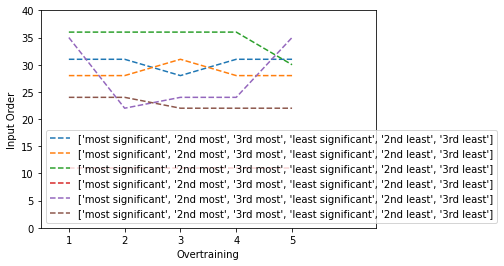

In [144]:
# plot the overtrained significant input orders
import matplotlib.pyplot as plt
x = np.arange(1, 6, 1)
ymax = np.array([[31, 28, 36, 23, 18, 10, 15, 17], [31, 28, 36,  7, 15, 18,  6,  4], [28, 31, 36, 10, 30, 23,  6, 15], [31, 28, 36, 30, 23, 18, 15, 10], [31, 28, 30,  7, 17, 29, 18, 36]])
y = np.array([[31, 28, 36, 11, 35, 24 ], [31, 28, 36, 11, 22, 24], [28, 31, 36, 11, 24, 22], [31, 28, 36, 11, 24, 22], [31, 28, 30, 11, 35, 22]])
ymin = np.array([[14, 25, 22, 37, 19, 24, 35, 11], [0, 14,  9, 37, 35, 24, 22, 11], [25, 14, 37, 9, 35, 22, 24, 11], [19, 14, 35, 9, 37, 22, 24, 11], [14, 37, 25, 24,  9, 22, 35, 11] ])
plt.plot(x, y, '--', label=['most significant', '2nd most', '3rd most', 'least significant', '2nd least', '3rd least'])
plt.axis([0.5, 6.5, 0, 40])
plt.xticks(x)
plt.legend(loc='best')
plt.xlabel('Overtraining')
plt.ylabel('Input Order')

In [145]:
# save selected pupil data
# data.to_csv('pupillary_dilation.csv', index=False)

In [146]:
# avg
train_inputs.iloc[0, :] = train_inputs.iloc[1:, :].sum(axis=0)/(train_inputs.shape[0]-1)